<a href="https://colab.research.google.com/github/Vivisteria11/Image-classification/blob/main/CSIR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.google.com



--2024-12-23 12:21:44--  https://www.google.com/
Resolving www.google.com (www.google.com)... 74.125.196.104, 74.125.196.103, 74.125.196.147, ...
Connecting to www.google.com (www.google.com)|74.125.196.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  19.22K  --.-KB/s    in 0s      

2024-12-23 12:21:44 (95.9 MB/s) - ‘index.html’ saved [19678]



torch.Size([64, 1, 28, 28])
torch.Size([64])
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        ...,
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015]])
Epoch 0 - Training loss: 0.0024395299110331263
Epoch 0 - Training loss: 0.004888032799336447
Epoch 0 - Training loss: 0.007352895574020678
Epoch 0 - Training loss: 0.0097948470349505
Epoch 0 - Training loss: 0.012220567477537

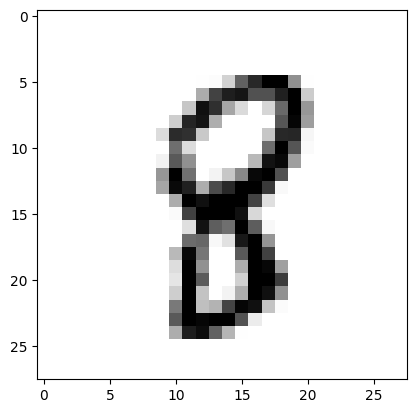

In [ ]:

#set up the environments
import torch
import torchvision
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset


# Load the MNIST dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset to [-1, 1] (similar to your normalization)
x_train = (x_train / 255.0 - 0.5) / 0.5
x_test = (x_test / 255.0 - 0.5) / 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
training_set = TensorDataset(x_train_tensor, y_train_tensor)
validation_set = TensorDataset(x_test_tensor, y_test_tensor)



#transform the image to tensor and then using mean and variance normalize it

#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])


#spilt into training and validation sets

#training_set = datasets.MNIST("/path...",download =True,train =True,transform =transform)
#validation_set= datasets.MNIST("/path..",download=True,train=Truerue,transform =transform)

#dataloader splits the data inot batches for training and shuffle reduces overfitting
training_loader = torch.utils.data.DataLoader(training_set,batch_size=64,shuffle=True)
validation_loader=torch.utils.data.DataLoader(validation_set,batch_size=64,shuffle=True)


iterator = iter(training_loader)#iterates over the training data
images,labels=next(iterator)#retrives the next batch of images and labels

print(images.shape)#should be a tensor with 64 images in a batch 1 for greyscale image each a 28*28 pixel images
print(labels.shape)#should be a tensor with 64 labels corresponding to the image

plt.imshow(images[0].numpy().squeeze(),cmap ='gray_r')# to display the image ,convert tensor to a numpy because matplotlib asks and squeeze any extra single dimension

#training the  model

input_size=784#flatten the images 28*28 =784
hidden_layers=(128,64)
output_size=10#0-9 digits present in the MNIST dataset

model = nn.Sequential(
        nn.Linear(input_size,hidden_layers[0]),
        nn.ReLU(),#introduces non linearity
        nn.Linear(hidden_layers[0],hidden_layers[1]),#maps it to the layers
        nn.ReLU(),
        nn.Linear(hidden_layers[1],output_size) ,
        nn.LogSoftmax(dim=1)

)

print(model)


logloss = nn.NLLLoss() #to calculate the negative log loss likelihood from the output of the softmax
images, labels = next(iter(training_loader)) #loads a batch of data continously
images = images.view(images.shape[0], -1) #flattens the image [batch_size,num_features]

log_probabilities = model(images) #log probabilities ,it is a tensor of log probablities
loss = logloss(log_probabilities, labels) #calculate the NLL loss compares predicted to true labels


print('Before backward pass: \n', model[0].weight.grad)#initially none
loss.backward()#readjusting the weights
print('After backward pass: \n', model[0].weight.grad)#will give out values

#stochastic gradient descent optimizier

optimizer = optim.SGD( model.parameters(),lr=0.01 ,momentum =0.9)#dont alter the parameter names as it is the arguments for the

epochs = 5

for e in range(epochs):
        loss_rate = 0 #cumulative loss for epoch

        for images,labels in training_loader:
                img =images.view(images.shape[0],-1)
                optimizer.zero_grad() #clears the gradient from previous steps

                output = model(img)

                loss = logloss(output,labels)

                loss.backward()

                optimizer.step()

                loss_rate += loss.item()#extracts the scalar value from the loss tensor to add it to the loss rate


                print("Epoch {} - Training loss: {}".format(e, loss_rate/len(training_loader)))

images, labels = next(iter(validation_loader))

# Select the first image and reshape it for the model
img = images[0].view(1, 784)

# Disable gradient calculation for inference
with torch.no_grad():
    log_probabilities = model(img)  # Get log probabilities from the model

# Convert log probabilities to probabilities
ps = torch.exp(log_probabilities)

# Get the predicted class (digit)
probab = list(ps.numpy()[0])  # Convert to a Python list
predicted_digit = probab.index(max(probab))  # Find the index of the max probability

# Display the results
print("Predicted Digit =", predicted_digit)
print("Probabilities for each digit class:", probab)


correctly_pred =0
total_img =0

for images,labels in validation_loader:
        for i in range(len(labels)):#for images in that batch

                img = images[i].view(1, 784)#1st batch flattened image

                with(torch.no_grad()):#disabled gradient for faster computation
                 output =model(img)

                 ps = torch.exp(output)#convert log probabilities to probabilities

                 probab = list(ps.numpy()[0])#ps.numpy()[0]: Converts the tensor of probabilities into a NumPy array.
                                             #list(ps.numpy()[0]): Converts the NumPy array into a Python list.
                                              #max(probab): Finds the highest probability.
                                              #probab.index(max(probab)): Returns the index of the highest probability, which corresponds to the predicted label.
                 pred_label = probab.index(max(probab))
                 true_label = labels.numpy()[i]


                if(true_label == pred_label):
                    correctly_pred+= 1
                total_img += 1


print("Number Of Images Tested =", total_img)
print("\nModel Accuracy =", (correctly_pred/total_img))


torch.save(model, './Mnist.pt')



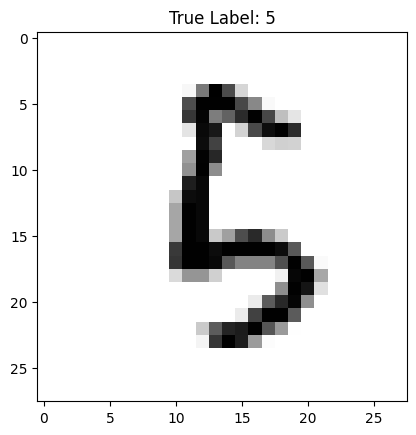

Predicted Label: 5
Probabilities: [0.0012 0.0007 0.0098 0.015  0.0039 0.5909 0.2769 0.     0.0971 0.0046]
True Label: 5


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to select a random image and test it
def test_random_image():
    # Select a random image from the validation set
    random_value = random.randint(0, len(validation_loader.dataset) - 1)#run it through the whole dataset
    img, label = validation_loader.dataset[random_value]  # Get the image and its label

    # Display the image
    plt.imshow(img.numpy().squeeze(), cmap="gray_r")
    plt.title(f"True Label: {label}")
    plt.show()

    # Flatten the image and pass it to the model
    img = img.view(1, 784)  # Flatten the image to match the input size
    with torch.no_grad():
        output = model(img)

    # Convert log probabilities to actual probabilities
    probabilities = torch.exp(output)
    probabilities_list = probabilities.numpy()[0]

    # Get the index of the maximum probability
    predicted_label = np.argmax(probabilities_list)

    # Print the results
    print(f"Predicted Label: {predicted_label}")
    print(f"Probabilities: {probabilities_list}")
    print(f"True Label: {label}")

# Call the function to test a random image
test_random_image()


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.datasets import mnist
from torch.utils.data import DataLoader, TensorDataset

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the dataset
x_train = (x_train / 255.0 - 0.5) / 0.5
x_test = (x_test / 255.0 - 0.5) / 0.5

# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create datasets
training_set = TensorDataset(x_train_tensor, y_train_tensor)
validation_set = TensorDataset(x_test_tensor, y_test_tensor)

# DataLoader
training_loader = DataLoader(training_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=True)

# Define the model with CNN and Fully Connected layers
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Define max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 3 * 3, 512)  # Adjusted for output size
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        # Apply convolutional layers with ReLU activations
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)  # Flatten the output
        x = nn.ReLU()(self.fc1(x))  # First fully connected layer
        x = self.fc2(x)  # Second fully connected layer (output layer)

        return x

# Initialize the model, loss function, and optimizer
model = CNN_Model()
logloss = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in training_loader:
        # Forward pass
        outputs = model(images)
        loss = logloss(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(training_loader)}")

# Evaluation on validation set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for faster inference
    for images, labels in validation_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the index of the max output
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")


Epoch 1, Loss: 0.3502662780631119
Epoch 2, Loss: 0.052825092793261606
Epoch 3, Loss: 0.03536710995198565
Epoch 4, Loss: 0.02646122193140194
Epoch 5, Loss: 0.020855277899742328
Validation Accuracy: 99.23%
